In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
BASE_PATH = "/content/drive/MyDrive/AI Enabled Recommendation Engine/Milestone_1/"

In [ ]:
os.makedirs(BASE_PATH + "dataset", exist_ok=True)
os.makedirs(BASE_PATH + "cleaned_data", exist_ok=True)

In [3]:
import os

os.listdir(BASE_PATH)

['dataset', 'cleaned_data']

In [4]:
import pandas as pd

df = pd.read_csv(BASE_PATH + "dataset/ecommerce_data.csv", encoding='ISO-8859-1')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [5]:
df = df[['CustomerID', 'StockCode', 'Quantity', 'InvoiceDate']]
df.head()

,CustomerID,StockCode,Quantity,InvoiceDate
0,17850.0,85123A,6,12/1/2010 8:26
1,17850.0,71053,6,12/1/2010 8:26
2,17850.0,84406B,8,12/1/2010 8:26
3,17850.0,84029G,6,12/1/2010 8:26
4,17850.0,84029E,6,12/1/2010 8:26


In [6]:
df.columns = ['user_id', 'product_id', 'quantity', 'timestamp']
df.head()

,user_id,product_id,quantity,timestamp
0,17850.0,85123A,6,12/1/2010 8:26
1,17850.0,71053,6,12/1/2010 8:26
2,17850.0,84406B,8,12/1/2010 8:26
3,17850.0,84029G,6,12/1/2010 8:26
4,17850.0,84029E,6,12/1/2010 8:26


In [7]:
df.isnull().sum()

,0
user_id,135080
product_id,0
quantity,0
timestamp,0


In [8]:
df.dropna(subset=['user_id'], inplace=True)

In [9]:
df = df[df['quantity'] > 0]

In [10]:
df['user_id'] = df['user_id'].astype(int)

In [11]:
interaction_df = (
    df.groupby(['user_id', 'product_id'])['quantity']
    .sum()
    .reset_index()
)

interaction_df.head()

,user_id,product_id,quantity
0,12346,23166,74215
1,12347,16008,24
2,12347,17021,36
3,12347,20665,6
4,12347,20719,40


In [12]:
interaction_df.to_csv(
    BASE_PATH + "cleaned_data/cleaned_interactions.csv",
    index=False
)

In [13]:
user_item_matrix = interaction_df.pivot_table(
    index='user_id',
    columns='product_id',
    values='quantity',
    fill_value=0
)

user_item_matrix.head()

product_id,10002,10080,10120,10123C,10124A,10124G,10125,10133,10135,11001,...,90214V,90214W,90214Y,90214Z,BANK CHARGES,C2,DOT,M,PADS,POST
user_id,,,,,,,,,,,,,,,,,,,,,
12346,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12347,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12348,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0
12349,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
12350,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [14]:
user_item_matrix.to_csv(BASE_PATH + "user_item_matrix.csv")

In [17]:
top_users = user_item_matrix.sum(axis=1).sort_values(ascending=False).head(10).index
top_products = user_item_matrix.sum(axis=0).sort_values(ascending=False).head(10).index

sample_matrix = user_item_matrix.loc[top_users, top_products]
sample_matrix

product_id,23843,23166,84077,22197,85099B,85123A,84879,21212,23084,22492
user_id,,,,,,,,,,
14646,0.0,96.0,0.0,0.0,2000.0,416.0,320.0,4104.0,4801.0,1728.0
16446,80995.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14911,0.0,144.0,528.0,928.0,110.0,770.0,184.0,672.0,48.0,252.0
12415,0.0,193.0,0.0,0.0,201.0,0.0,0.0,360.0,1536.0,2916.0
12346,0.0,74215.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17450,0.0,0.0,0.0,0.0,0.0,4114.0,0.0,0.0,0.0,0.0
17511,0.0,0.0,0.0,1500.0,1610.0,608.0,800.0,480.0,0.0,0.0
18102,0.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,0.0,0.0
13694,0.0,0.0,0.0,0.0,1200.0,192.0,0.0,600.0,0.0,0.0


In [15]:
top_products = (
    interaction_df
    .groupby('product_id')['quantity']
    .sum()
    .sort_values(ascending=False)
)

top_products.head(10)

,quantity
product_id,
23843,80995
23166,77916
84077,54415
22197,49183
85099B,46181
85123A,36782
84879,35362
21212,33693
23084,27202


<Axes: title={'center': 'Top 10 Most Purchased Products'}, xlabel='product_id'>

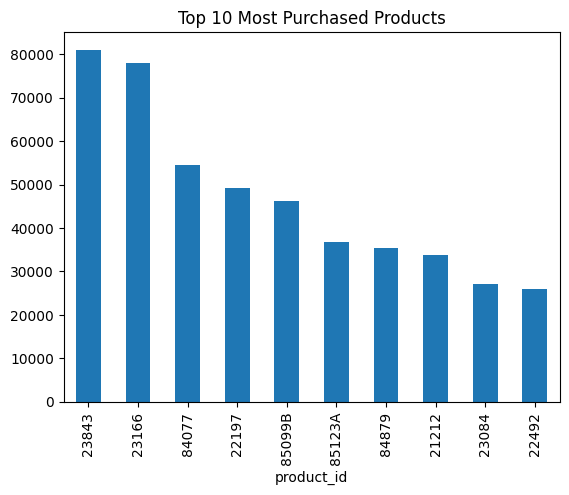

In [16]:
top_products.head(10).plot(
    kind='bar',
    title='Top 10 Most Purchased Products'
)

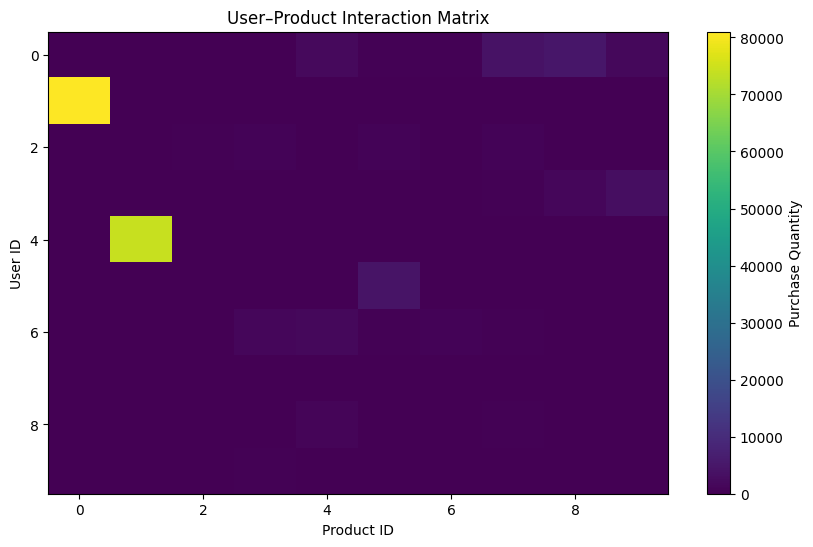

In [18]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.imshow(sample_matrix, aspect='auto')
plt.colorbar(label='Purchase Quantity')
plt.xlabel('Product ID')
plt.ylabel('User ID')
plt.title('User–Product Interaction Matrix')
plt.show()